# **Building ANN using PyTorch**

## **Import Dependencies**

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = 'Times New Roman'

# Setup device agnostic code to run the model on GPU
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'
print('Current device:', device)

Current device: cuda


## **Read the Dataset**

In [28]:
# Load the Fashion MNIST dataset using Pandas
train_data = pd.read_csv(r'D:\GITHUB\pytorch-for-deep-learning-and-machine-learning\datasets\fashion-mnist_train.csv')
test_data = pd.read_csv(r'D:\GITHUB\pytorch-for-deep-learning-and-machine-learning\datasets\fashion-mnist_test.csv')

print(train_data.shape, test_data.shape)
train_data.head()

(60000, 785) (10000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **Data Pre-processing**

### **Split the Data into Input and Target**

In [29]:
# Split the data into target and labels
X_train, y_train = train_data.drop(columns=['label']), train_data['label']
X_test, y_test = test_data.drop(columns=['label']), test_data['label']

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_train.head()

(60000, 784) (10000, 784) (60000,) (10000,)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


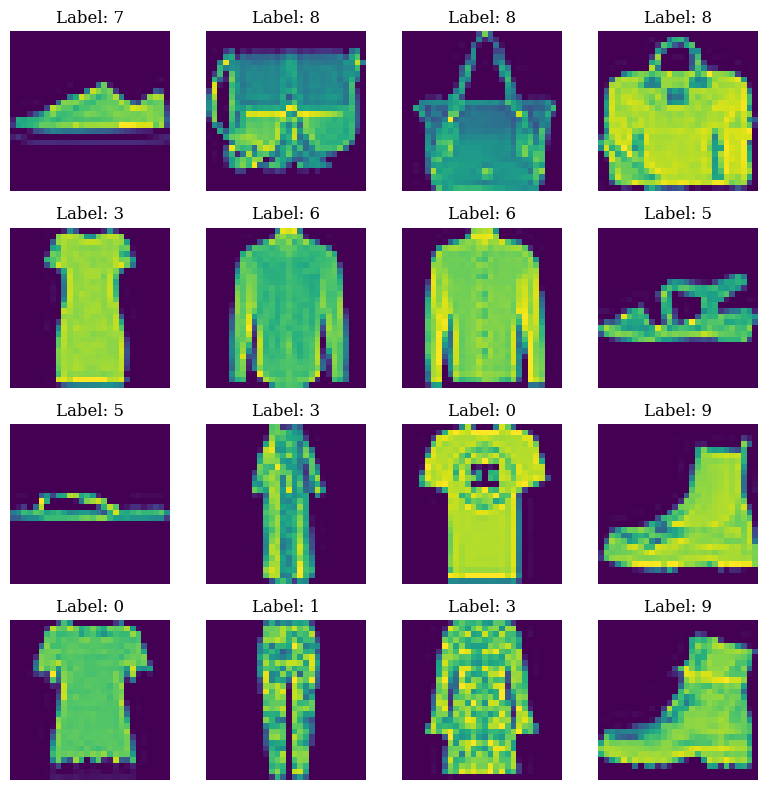

In [30]:
# Create a 4x4 grid of random images from training data
random_ids = [random.randint(0, X_train.shape[0]) for i in range(16)]

fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(8, 8))

for i, ax in enumerate(axes.flat):
    img = X_train.iloc[random_ids[i]].values.reshape(28, 28)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f'Label: {y_train[random_ids[i]]}')

plt.tight_layout()
plt.show()

### **Scale the Data**

In [31]:
X_train = X_train / 255
X_test = X_test / 255

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


### **Convert NumPy Arrays to PyTorch Tensors**

In [32]:
X_train = torch.from_numpy(X_train.values).type(torch.float32).to(device)
X_test = torch.from_numpy(X_test.values).type(torch.float32).to(device)
y_train =  torch.from_numpy(y_train.values).type(torch.float32).to(device)
y_test =  torch.from_numpy(y_test.values).type(torch.float32).to(device)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

torch.Size([60000, 784]) torch.Size([10000, 784]) torch.Size([60000]) torch.Size([10000])


## **Create Dataset and DataLoader**

In [33]:
# Create a Fashion MNIST dataset class
class FashionMNISTDataset(Dataset):

    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return self.features.shape[0]

    def __getitem__(self, index):
        return self.featurs[index], self.labels[index]

# Create the training and testing dataset
train_dataset = FashionMNISTDataset(X_train, y_train)
test_dataset = FashionMNISTDataset(X_test, y_test)

In [34]:
# Create dataloader object
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)

## **Build an Artificial Neural Network (ANN) Model**

In [38]:
class MyANNModel(nn.Module):

    def __init__(self, n_features):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(in_features=n_features, out_features=128),
            nn.ReLU(),
            nn.Linear(in_features=128, out_features=64),
            nn.ReLU(),
            nn.Linear(in_features=64, out_features=10),
            nn.Softmax()
        )

    def forward(self, X: torch.Tensor):
        out = self.network(X)
        return out